In [2]:
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# load `.mat` file
data = scipy.io.loadmat('face.mat')

# Images
# N: number of images
# D: number of pixels
X = data['X']  # shape: [D x N]
y = data['l']  # shape: [1 x N]

assert(X.shape[1] == y.shape[1])
# Number of images
D, N = X.shape

# Fix the random seed
np.random.seed(13)

# Cardinality of labels
_card = len(set(y.ravel()))

# Step splitting of dataset
_step = int(N / _card)

# Shape boundaries
_bounds = np.arange(0, N+1, _step)

# Shapes
shapes = list(zip(_bounds[:-1], _bounds[1:]))

# Training Mask
_mask = []

for _shape in shapes:
    _idx = np.random.choice(
        np.arange(*_shape), int(0.8 * _step), replace=False)
    _mask.append(_idx)

mask_train = np.array(_mask).ravel()

mask_test = np.array(list(set(np.arange(0, N)) - set(mask_train)))

# Partition dataset to train and test sets
X_train, X_test = X[:, mask_train], X[:, mask_test]
y_train, y_test = y[:, mask_train], y[:, mask_test]

In [3]:
class PCA(object):
    """Principle Component Analysis."""

    def __init__(self, n_comps=5, standard=True):
        """Contructor.
        Parameters
        ----------
        n_comps: int
            Number of principle components
        """
        self._fitted = False
        self.n_comps = n_comps
        self.standard = standard
        self.mean = None
        self.U = None

    def fit(self, X):
        """Fit PCA according to `X.cov()`.
        Parameters
        ----------
        X: numpy.ndarray
            Features matrix
        Returns
        -------
        array: numpy.ndarray
            Transformed features matrix
        """
        self.D, N = X.shape
        self.mean = X.mean(axis=1).reshape(-1, 1)
        # center data
        A = X - self.mean
        # covariance matrix
        S = (1 / N) * np.dot(A.T, A)
        
        _l, _v = np.linalg.eig(S)

        _indexes = np.argsort(_l)[::-1]

        # Sorted eigenvalues and eigenvectors
        l, v = _l[_indexes], _v[:, _indexes]

        V = v[:, :self.n_comps]

        _U = np.dot(A, V)

        self.U = _U / np.apply_along_axis(np.linalg.norm, 0, _U)

        W = np.dot(self.U.T, A)

        if self.standard:
            self.W_mean = np.mean(W, axis=1)
            self.W_std = np.std(W, axis=1)

        self._fitted = True

        if self.standard:
            return ((W.T - self.W_mean) / self.W_std).T
        else:
            return W

    def transform(self, X):
        """Transform `X` by projecting it to PCA feature space.
        Parameters
        ----------
        X: numpy.ndarray
            Features matrix
        Returns
        -------
        array: numpy.ndarray
            Transformed features matrix
        """

        Phi = X - self.mean

        W = np.dot(self.U.T, Phi)

        if self.standard:
            return ((W.T - self.W_mean) / self.W_std).T
        else:
            return W

    def reconstruct(self, W):
        """Recontruct compressed data.
        Parameters
        ----------
        W: numpy.ndarray
            Projection coefficients matrix
        Returns
        -------
        X_hat: numpy.ndarray
            Reconstructed features matrix
        """
        A_hat = np.dot(self.U, W).reshape(-1, 1)
        A_hat = A_hat + self.mean
        return A_hat

In [4]:
# KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

M = 1
standard = False
M_train = np.arange(1,416)
acc_train = []

k = 1
k_acc_train = []



D, N = X_train.shape

while k < 8:
    M = 1
    while M < 416:
        pca = PCA(n_comps=M, standard=standard)

        W_train = pca.fit(X_train)

        I, K = X_test.shape

        nn = KNeighborsClassifier(n_neighbors=k)
        nn.fit(W_train.T, y_train.T.ravel())


        W_test = pca.transform(X_test)

        acc = nn.score(W_test.T, y_test.T.ravel())


        print('Accuracy = %.2f%%' % (acc * 100))
        acc_train.append(acc*100)
        

        M = M + 1

    k_acc_train.append(acc_train)
    acc_train = []
    k = k + 1

Accuracy = 4.81%
Accuracy = 8.65%
Accuracy = 18.27%
Accuracy = 24.04%
Accuracy = 38.46%
Accuracy = 36.54%
Accuracy = 34.62%
Accuracy = 36.54%
Accuracy = 38.46%
Accuracy = 41.35%
Accuracy = 44.23%
Accuracy = 46.15%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 51.92%
Accuracy = 51.92%
Accuracy = 50.96%
Accuracy = 52.88%
Accuracy = 52.88%
Accuracy = 51.92%
Accuracy = 52.88%
Accuracy = 54.81%
Accuracy = 54.81%
Accuracy = 59.62%
Accuracy = 57.69%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 60.58%
Accuracy = 59.62%
Accuracy = 59.62%
Accuracy = 59.62%
Accuracy = 61.54%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 57.69%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 58.65%
Accuracy = 59.62%
Accuracy = 58.65%
Accuracy = 60.58%
Accuracy = 62.50%
Accuracy = 61.54%
Accuracy = 61.54%
Accuracy = 61.54%
Accuracy = 62.50%
Accuracy = 62.50%
Accuracy = 63.46%
Accuracy = 63.46%
Accuracy = 62.50%
Accuracy = 61.54%
Accuracy = 62.50%
Accuracy = 62.50%
Accuracy = 63.46%
Accuracy = 62.50%
Accuracy = 6

Accuracy = 50.00%
Accuracy = 50.00%
Accuracy = 50.00%
Accuracy = 50.00%
Accuracy = 48.08%
Accuracy = 50.00%
Accuracy = 50.00%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 50.00%
Accuracy = 50.00%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 49.04%
Accuracy = 48.08%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 46.15%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 49.04%
Accuracy = 50.00%
Accuracy = 50.96%
Accuracy = 50.96%
Accuracy = 50.96%
Accuracy = 51.92%
Accuracy = 51.92%
Accuracy =

Accuracy = 46.15%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 48.08%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 47.12%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 46.15%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy =

Accuracy = 44.23%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 42.31%
Accuracy = 42.31%
Accuracy = 42.31%
Accuracy = 42.31%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 43.27%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 45.19%
Accuracy = 46.15%
Accuracy = 45.19%
Accuracy = 45.19%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 45.19%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy =

Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 43.27%
Accuracy = 43.27%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy = 44.23%
Accuracy =

Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy =

Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 39.42%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy = 40.38%
Accuracy =

In [5]:
len(k_acc_train[0])

415

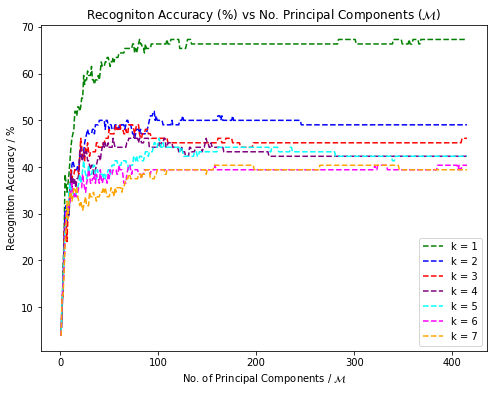

In [7]:
plt.figure(figsize=(8.0, 6.0))
plt.plot(M_train, k_acc_train[0], color='green', linestyle='dashed', label='k = 1')
plt.plot(M_train, k_acc_train[1], color='blue', linestyle='dashed', label='k = 2')
plt.plot(M_train, k_acc_train[2], color='red', linestyle='dashed', label='k = 3')
plt.plot(M_train, k_acc_train[3], color='purple', linestyle='dashed', label='k = 4')
plt.plot(M_train, k_acc_train[4], color='cyan', linestyle='dashed', label='k = 5')
plt.plot(M_train, k_acc_train[5], color='magenta', linestyle='dashed', label='k = 6')
plt.plot(M_train, k_acc_train[6], color='orange', linestyle='dashed', label='k = 7')
plt.title('Recogniton Accuracy (%) vs No. Principal Components ($\mathcal{M}$)')
plt.xlabel('No. of Principal Components / $\mathcal{M}$')
plt.ylabel('Recogniton Accuracy / %')
plt.legend(loc='best')
